# Optimal parameters for radiation reaction experiments

C Arran _et al_ 2019 Plasma Phys. Control. Fusion 61 074009 https://iopscience.iop.org/article/10.1088/1361-6587/ab20f6 (Open Access)

Notebook by: Óscar Amaro

Data collected with WebPlotDigitizer

In [38]:
# numpy
import numpy as np
np.random.seed(19680801)
from numpy.random import default_rng
rng = default_rng()

import pandas as pd

# import functions
#from scipy.special import kv, iv, erf
from scipy.integrate import quad
from numpy import log, log10, sin, cos, exp, sqrt, pi

# interpolate
from scipy import interpolate

# physical constants
#from scipy.constants import speed_of_light, fine_structure, hbar, elementary_charge, electron_mass
#tauC = hbar/(electron_mass*speed_of_light**2) # Compton length
#ES = electron_mass**2*speed_of_light**3/elementary_charge/hbar # Schwinger field

# root finding
from scipy.optimize import fsolve
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
from tqdm import tqdm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
    returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

In [83]:
m = 0.511; # [MeV]
k = 6.9 * 4.4e-7; # this was a value found to reproduce approximately the Fig2 a
a0lst = np.linspace(0,25)

def eps0a(epsf, a0):
    "initial electron energy required for final average energy to be epsf (analytical approximation of contour lines)"
    gf = epsf/m
    res = m*gf/(1-k*gf*a0**2)
    res[res<0] = 3000
    return res

def eps0b(epssigf, a0):
    "initial electron energy required for final energy spread to be sigf (analytical approximation of contour lines)"
    g0 = np.linspace(0,2e3,3000)/m
    gf = g0/(1+k*g0*a0**2)
    chie = 4e-6 * a0 * gf;
    sigflst = 0.7*sqrt(chie)*g0
    diff = np.abs(sigflst - epssigf/m)
    return g0[np.argmin(diff)]*m

def eps0c(ecrit, a0):
    "initial electron energy required for photon critical energy to be ecrit (analytical approximation of contour lines)"
    #return 733.236*sqrt(ecrit/a0)*m # this is too crude an approximation
    g0 = np.linspace(0,2e3,3000)/m
    w0 = 1.24e-6; #[MeV]
    gf = g0/(1+0.2*k*g0*a0**2) # where the extra 0.2 factor was added for better fit of the data from the paper
    ecritt = 1.5 * gf**2 * a0 * w0;
    diff = np.abs(ecritt - ecrit)
    return g0[np.argmin(diff)]*m

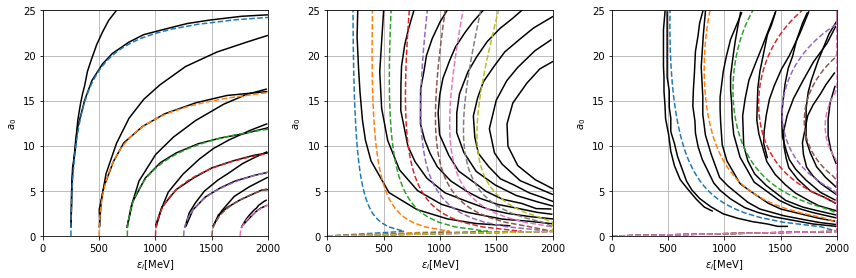

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

f = open('data/fig2a/wpd.json')
data = json.load(f)
for j in range(len(data['datasetColl'])):
    datatmp=data['datasetColl'][j]['data']
    datatmp2=np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,1])
    axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-')
f.close()
for epsf in np.arange(250,1800,250):
    axes[0].plot(eps0a(epsf, a0lst), a0lst, '--', alpha=1)

f = open('data/fig2b/wpd.json')
data = json.load(f)
for j in range(len(data['datasetColl'])):
    datatmp=data['datasetColl'][j]['data']
    datatmp2=np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,1])
    axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-')
f.close()
for epssigf in np.arange(25,230,25):
    axes[1].plot(np.array([eps0b(epssigf, a0) for a0 in a0lst]), a0lst, '--', alpha=1)

f = open('data/fig2c/wpd.json')
data = json.load(f)
for j in range(len(data['datasetColl'])):
    datatmp=data['datasetColl'][j]['data']
    datatmp2=np.array([datatmp[i]['value'] for i in range(len(datatmp))])
    indxs = np.argsort(datatmp2[:,1])
    axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'k-')
f.close()
for ecrit in np.arange(25,180,25):
    axes[2].plot(np.array([eps0c(ecrit, a0) for a0 in a0lst]), a0lst, '--', alpha=1)

for i in range(3):
    axes[i].set_xlim([0,2000])
    axes[i].set_ylim([0,25])
    axes[i].grid()
    axes[i].set_xlabel(r'$\epsilon_i$[MeV]')
    axes[i].set_ylabel(r'$a_0$')

    # aspect
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=1/axesratio)

plt.tight_layout()
plt.show()